In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [4]:
file_path = '../data/raw/raw_analyst_ratings.csv'

# Read the CSV file
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame       
print(df.head())
# Display the columns of the DataFrame  
print(df.columns)

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


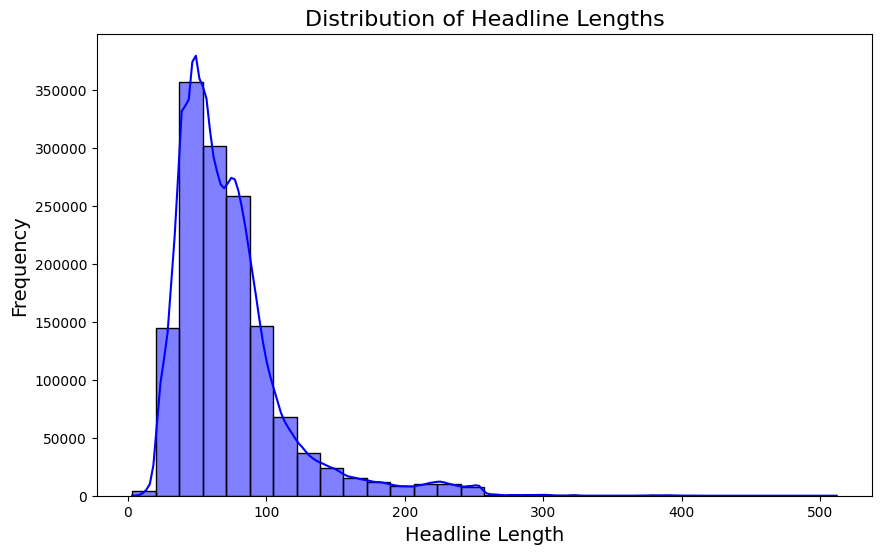

In [5]:
# Add a column for headline length
df['headline_length'] = df['headline'].apply(len)

# Display basic statistics for headline lengths
print("Headline Length Statistics:")
print(df['headline_length'].describe())

# Plot distribution of headline lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


Articles Per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


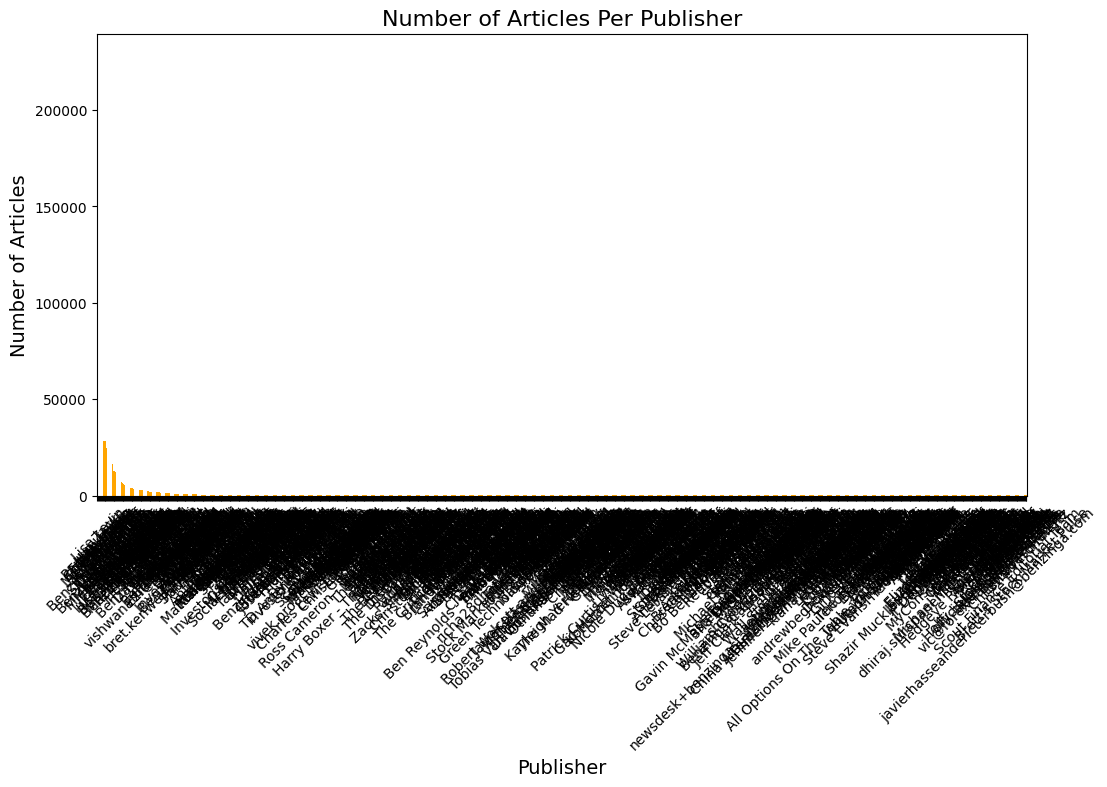

In [6]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("Articles Per Publisher:")
print(publisher_counts)

# Visualize the publisher distribution
plt.figure(figsize=(12, 6))
publisher_counts.plot(kind='bar', color='orange')
plt.title('Number of Articles Per Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45)
plt.show()
